In [1]:
from numba import jit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L=10        # lado do quadrado inicial
N=L*L        # numero de partículas

rho=1.0       # densidade
boxsize= np.sqrt(N/rho)    # dimensao linear da caixa

temper=1.0     # Temperatura

rcut=2.5      # Raio de corte Lennard-Jones
rcut=rcut**2

rv=100        # Raio para lista de verlet
rv=rv**2

In [81]:
def conf_ini(N,boxsize,temper):

    L=int(np.sqrt(N))     # Define a dimensao linear da rede quadrada  (Atencao!!! A raiz quadrada de N é suposta inteira)  

    x=np.zeros(N)  
    y=np.zeros(N)  

    vx=np.zeros(N)  
    vy=np.zeros(N)  

    cont=0  
    for i in range(L):  
        for j in range(L):  

            # distribui as partículas numa rede quadrada centrada  
            x[cont]=(i+0.5)-L/2  
            y[cont]=(j+0.5)-L/2  

            # Escolhe a velocidade uniformemente num circulo unitario  
            phi=np.random.uniform(0,2*np.pi)    
            vx[cont]=np.cos(phi)  
            vy[cont]=np.sin(phi)  

            cont += 1  

    # normaliza as posições para dentro da caixa  
    x=x/L*boxsize  
    y=y/L*boxsize  

    # normaliza as velocidades de acordo com o teorema da equiparticao da energia  
    prov=np.sqrt((2.0-2.0/N)*temper)  

    vx=vx*prov  
    vy=vy*prov  

    # Zera o momento total das partículas  
    prov=np.sum(vx)  
    vx=vx-prov/N  
    prov=np.sum(vy)  
    vy=vy-prov/N  


    return x,y,vx,vy

In [ ]:
x,y,vx,vy = conf_ini(N,boxsize,temper)  

print(np.sum(vx))  

for i in range(N):  
    print(i,x[i],y[i])

In [83]:
def verlet_list(x,y,rv,boxsize):     # Cria uma lista de Verlet para definir os vizinhos  

    N = len(x)     # numero de particulas  

    nviz = np.zeros(N,np.int64)    # declara os arrays  
    viz = np.empty(0,np.int64)         

    cont=0  # contador do numero de vizinhos (indice do array viz)  

    for i in range(N):         # loop sobre todas as partículas  
        
        for j in range(i+1,N): # loop sobre todos os possiveis vizinhos  

            xij = x[i]-x[j]     # Distancia entre as partículas  
            yij = y[i]-y[j]  

            xij = xij - boxsize*np.rint(xij/boxsize)  # aplica condicoes de contorno periódicas  
            yij = yij - boxsize*np.rint(yij/boxsize)  

            r2 = xij*xij + yij*yij  


        if r2 < rv:  
            cont += 1  
            nviz[i] = cont  
            viz=np.append(viz,[j])  

    return nviz,viz

In [87]:
%time _ = verlet_list(x,y,rv,boxsize) 

Wall time: 22 ms


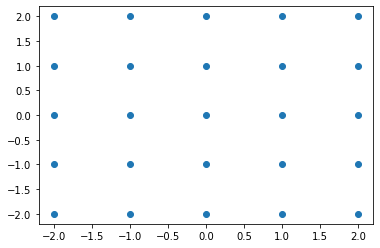

In [54]:
plt.scatter(x,y)

In [7]:
nviz,viz = verlet_list(x,y,rv,boxsize)

print(nviz)
print(' ')
print(viz)

[0 0 0 1 0 0 0 0 0 0 0 2 3 0 4 5]
 
[15 15 15 15 15]


In [8]:
i=15
for j in range(nviz[i-1],nviz[i]):  # realiza um loop sobre os vizinhos da particula i
    print(j,viz[j])

4 15
